# Web-Scraping - Statistiken von Statista downloaden
© Thomas Robert Holy 2020
<br>
Version 1.0
<br><br>
Visit me on GitHub: https://github.com/trh0ly

## Grundlegende Einstellungen:
### Import von Modulen
Zunächst müssen die notwendigen Module importiert werden, damit auf diese zugegriffen werden kann. 

In [1]:

#----------------
# Web-Scraping
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
import re
import string

#----------------
# Forecast
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
import statsmodels.api as sm

#----------------
# Verschiedenes
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import datetime
from IPython.core.display import display, HTML


### Optikeinstellungen
Anschließend werden Einstellungen definiert, die die Formatierung der Ausgaben betreffen.
Hierfür wird das Modul `operator` genutzt.
Außerdem wird die Breite des im Folgenden genutzten DataFrames erhöht und die Größe der Grafiken modifiziert, welche später angezeigt werden sollen.

In [2]:

%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;


<IPython.core.display.Javascript object>

In [3]:

display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.width', 350)
plt.rcParams['figure.figsize'] = (36, 12) # macht die Plots größer


## Datenbeschaffung und Manipulation
### Web-Scraping historischer Daten von Statista
Mittels Web-Scraping werden historische Daten zu Umsätzen verschiedener Unternehmen von Statista gedownloaded und aufbereitet, bevor diese in zwei separaten Listen gespeichert werden.

In [4]:

#----------------------------------------
# Datensätze
#----------------
# Amazon
#url = 'https://www.statista.com/statistics/273963/quarterly-revenue-of-amazoncom/'
#----------------
# Apple
#url = 'https://www.statista.com/statistics/263427/apples-net-income-since-first-quarter-2005/'
#----------------
# Alibaba
url = 'https://www.statista.com/statistics/323046/alibaba-quarterly-group-revenue/'

#----------------------------------------
# Daten beschaffen und Tabellen extrahieren
html = requests.get(url)
soup = BeautifulSoup(html.text, 'lxml')

chart = soup.find("tbody")
children = chart.find_all("tr")

#----------------------------------------
# Extrahierte Tabellen bereinigen
data = []
for tag in children:
    data_tuple = (tag.text[:6],tag.text[6:])
    data.append(data_tuple)

quartals, revenues = [], []
for i in range(0, len(data)):
    x = data[i][0]
    y = data[i][1]
    quartal = x.replace(' ', '')
    y = y.replace(',', '.')
    revenue = float(y)
    quartals.append(quartal)
    revenues.append(revenue)

#----------------------------------------
# Reihenfolge der extrahierten Daten umkehren und ausgeben
    
quartals = quartals[::-1]
revenues = revenues[::-1]
print(quartals)
print(revenues)


["Q4'13", "Q1'14", "Q2'14", "Q3'14", "Q4'14", "Q1'15", "Q2'15", "Q3'15", "Q4'15", "Q1'16", "Q2'16", "Q3'16", "Q4'16", "Q1'17", "Q2'17", "Q3'17", "Q4'17", "Q1'18", "Q2'18", "Q3'18", "Q4'18", "Q1'19", "Q2'19", "Q3'19", "Q4'19"]
[18.745, 12.031, 15.771, 16.829, 26.179, 17.425, 20.245, 22.171, 34.543, 24.184, 32.154, 34.292, 53.248, 38.579, 50.184, 55.122, 83.028, 61.932, 80.92, 85.148, 117.278, 93.498, 114.924, 119.017, 161.456]


### Weitere Modifikationen
Die von der Website extrahierten Quartalskennzeichnungen in ein für datime interpretierbares Format überführt.

In [5]:

#----------------------------------------
# Quartale in ein für datime interpretierbares Format überführen 
quartals_new = []
for i in quartals:
    x = '20' + str(i[3:])
    y = i[:2]
    z = str(x) + '-' + str(y)
    quartals_new.append(z)
    
quartals_new[:5]


['2013-Q4', '2014-Q1', '2014-Q2', '2014-Q3', '2014-Q4']

## Erstellung eines DataFrames und Visualisierung
### Generierung des DataFrames
Es wird ein DataFrame erzeugt, welcher die Umsätze zum jeweiligen Quartal enthält. 

In [6]:

#----------------------------------------
# DataFrame mit bereinigten Daten erzeugen
original_data = pd.DataFrame({'Periode':quartals_new, 'Umsatz':revenues})
original_data['Periode'] = pd.to_datetime(original_data['Periode'].str.replace(r'(Q\d) (\d+)', r'\2-\1'), errors='coerce')
original_data.tail()


,Periode,Umsatz
20,2018-10-01,117.278
21,2019-01-01,93.498
22,2019-04-01,114.924
23,2019-07-01,119.017
24,2019-10-01,161.456


### Visualisierung der Daten
Der DataFrame wird visualisiert.

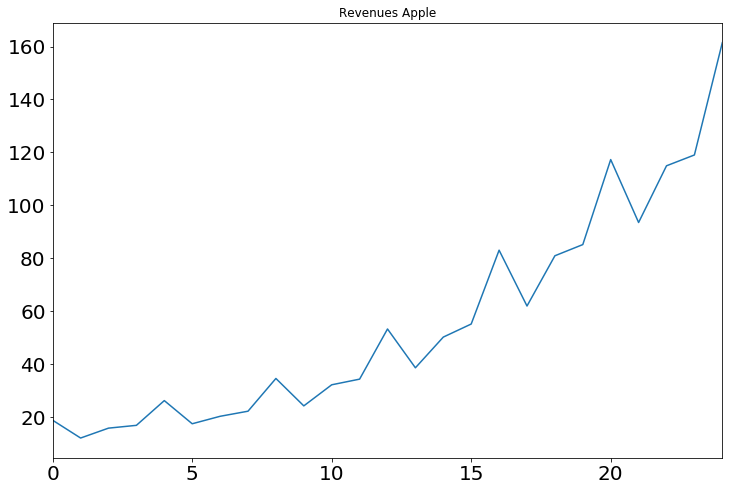

In [7]:

#----------------------------------------
# Plotten der Daten
original_data.Umsatz.plot(figsize=(12,8), title='Revenues Apple', fontsize=20)
